Import Libraries for EDA

In [100]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import re
import random

Reading Datasets

In [50]:
data1 = pd.read_csv('cpsaat_2015_2021.csv')
data2 = pd.read_csv('taba2.csv')
data3 = pd.read_csv('taba3.csv')
data4 = pd.read_csv('taba-2.csv')
data5 = pd.read_csv('taba-3.csv')

EDA on first dataset

In [7]:
data1.head(15).style.background_gradient(cmap='Blues').set_properties(**{'font-family': 'Segoe UI'}).hide_index()

C:\Users\zee52\AppData\Local\Temp\ipykernel_52152\2878930740.py:1: FutureWarning: this method is deprecated in favour of `Styler.hide(axis='index')`
  data1.head(15).style.background_gradient(cmap='Blues').set_properties(**{'font-family': 'Segoe UI'}).hide_index()


Civilian noninstitutional population,Civilian labor force,Participation rate,Employed,Employment-population ratio,Unemployed,Unemployment rate,Sex,Race,Year
"24,175","10,971",45.400000,"10,098",41.800000,873,8.000000,nan,nan,2015
"61,712","35,322",57.200000,"33,402",54.100000,"1,920",5.400000,nan,nan,2015
"56,263","37,481",66.600000,"35,785",63.600000,"1,695",4.500000,nan,nan,2015
"35,326","22,706",64.300000,"21,573",61.100000,"1,134",5.000000,nan,nan,2015
"20,937","14,774",70.600000,"14,213",67.900000,562,3.800000,nan,nan,2015
"70,061","52,133",74.400000,"50,792",72.500000,"1,341",2.600000,nan,nan,2015
"44,086","32,684",74.100000,"31,772",72.100000,912,2.800000,nan,nan,2015
"25,975","19,449",74.900000,"19,020",73.200000,429,2.200000,nan,nan,2015
"12,137","7,081",58.300000,"6,573",54.200000,507,7.200000,Men,nan,2015
"30,388","20,416",67.200000,"19,302",63.500000,"1,114",5.500000,Men,nan,2015


In [8]:
data1.shape

(392, 10)

In [11]:
data1.describe()

,Participation rate,Employment-population ratio,Unemployment rate,Year
count,392.000000,392.000000,392.000000,392.000000
mean,66.596173,63.677296,4.653061,2018.000000
std,11.037426,11.425293,2.613949,2.002556
min,32.300000,28.200000,1.700000,2015.000000
25%,60.775000,57.550000,2.800000,2016.000000
50%,69.600000,66.900000,3.900000,2018.000000
75%,74.125000,72.025000,5.625000,2020.000000
max,81.800000,80.200000,16.600000,2021.000000


Check for null values

In [12]:
data1.isnull().sum()

Civilian noninstitutional population      0
Civilian labor force                      0
Participation rate                        0
Employed                                  0
Employment-population ratio               0
Unemployed                                0
Unemployment rate                         0
Sex                                     280
Race                                    168
Year                                      0
dtype: int64

In [13]:
print('We have ',(280/390)*100,'% null values in sex feature')
print('We have ',(168/390)*100,'% null values in race feature')

We have  71.7948717948718 % null values in sex feature
We have  43.07692307692308 % null values in race feature


Since sex feature contains a majority of null values, it might be appropriate to drop it. 

In [15]:
data1 = data1.drop(['Sex'],axis=1)

In [17]:
data1.isnull().sum()

Civilian noninstitutional population      0
Civilian labor force                      0
Participation rate                        0
Employed                                  0
Employment-population ratio               0
Unemployed                                0
Unemployment rate                         0
Race                                    168
Year                                      0
dtype: int64

In [18]:
data1['Race'].value_counts()

White                           56
Black or African American       56
Asian                           56
Hispanic or Latino ethnicity    56
Name: Race, dtype: int64

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Race', ylabel='count'>

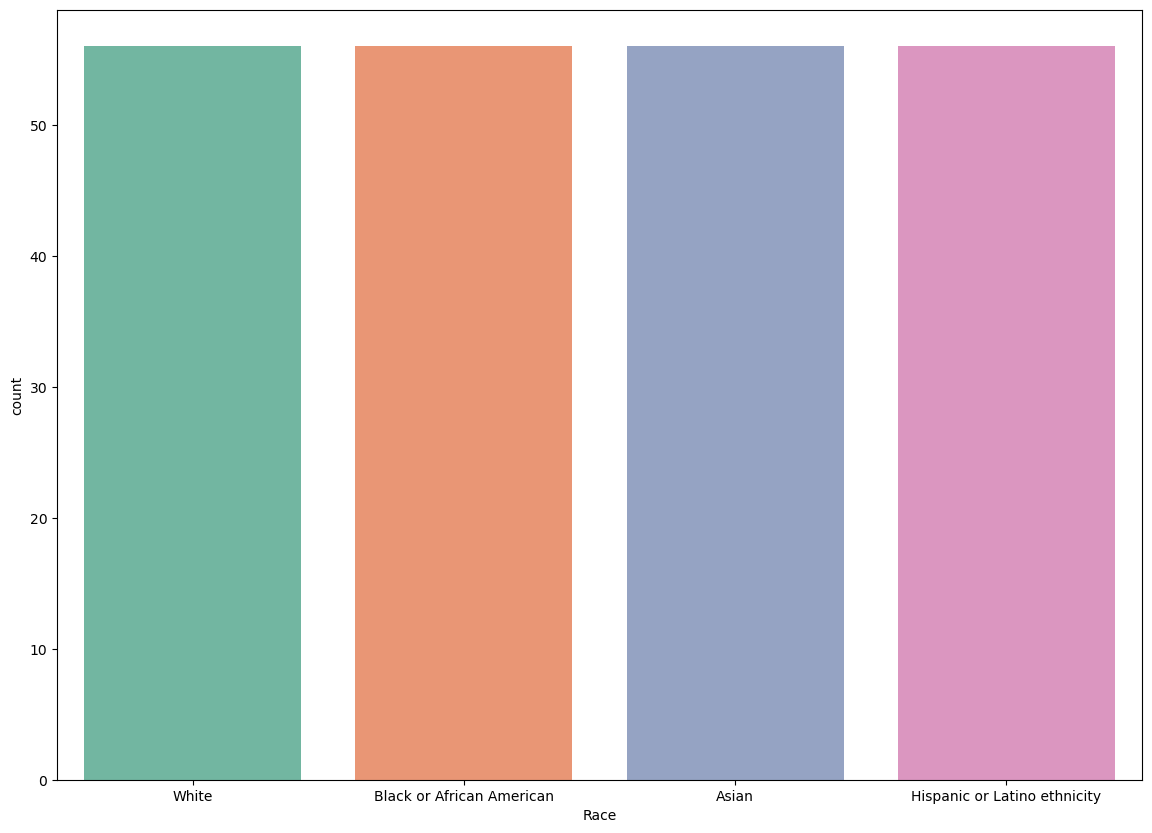

In [25]:
plt.figure(figsize= (14,10))
sns.countplot(data1['Race'],palette='Set2')

Seems a little strange that the count for each separate race is exactly 56. 

Initial correlation map 

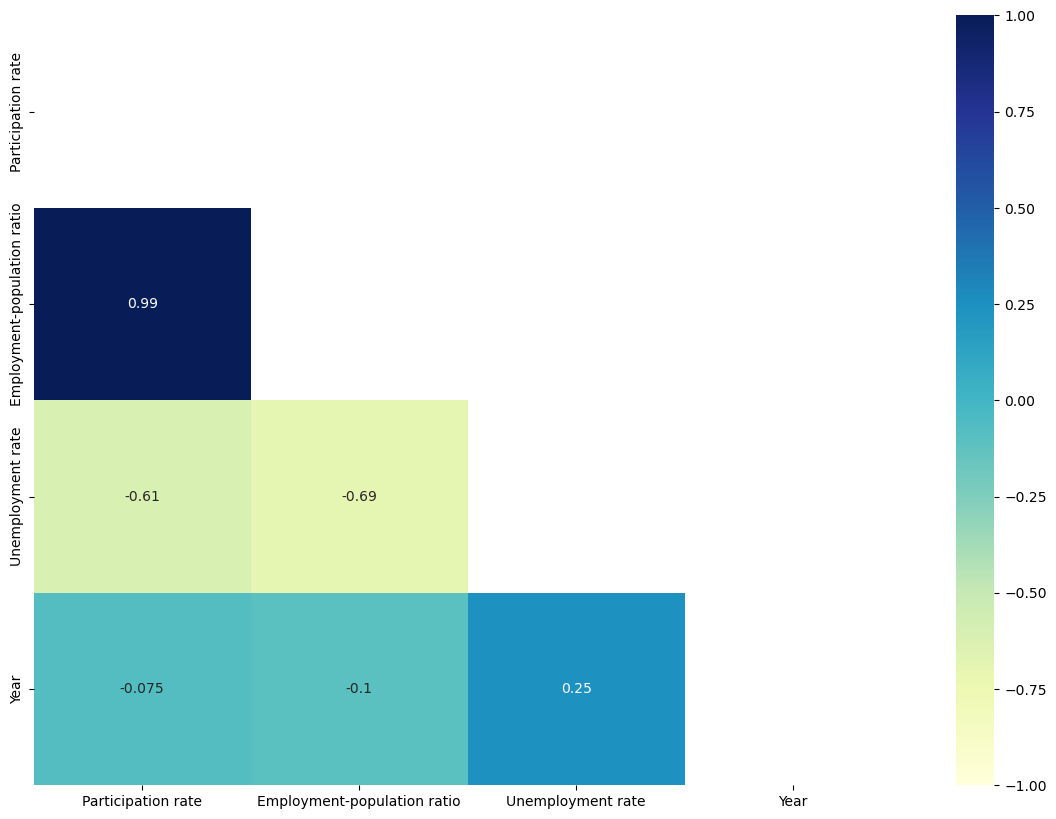

In [20]:
plt.figure(figsize= (14,10))

corr = data1.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True



sns.heatmap(data = corr,
            annot = True,
            mask = mask,
            cmap = "YlGnBu",
            vmin = -1,
            vmax = 1);

In [27]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Civilian noninstitutional population  392 non-null    object 
 1   Civilian labor force                  392 non-null    object 
 2   Participation rate                    392 non-null    float64
 3   Employed                              392 non-null    object 
 4   Employment-population ratio           392 non-null    float64
 5   Unemployed                            392 non-null    object 
 6   Unemployment rate                     392 non-null    float64
 7   Race                                  224 non-null    object 
 8   Year                                  392 non-null    int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 27.7+ KB


Civilian noninstitutional population, Civilian labor force, Unemployed and Employed features contain numeric data but are listed as object data types. They should be converted to numerical data type. 

To be able to convert we first must remove "," from Unemployed, Employed , Civilian noninstitutional population and Civilian labor force columns.

In [28]:
data1['Civilian noninstitutional population'] = data1['Civilian noninstitutional population'].str.replace(',', '')
data1['Civilian noninstitutional population']

0      24175
1      61712
2      56263
3      35326
4      20937
       ...  
387     4761
388     3090
389     7432
390     5174
391     2259
Name: Civilian noninstitutional population, Length: 392, dtype: object

In [29]:
data1['Civilian labor force'] = data1['Civilian labor force'].str.replace(',', '')
data1['Civilian labor force']

0      10971
1      35322
2      37481
3      22706
4      14774
       ...  
387     3384
388     2270
389     5880
390     4064
391     1816
Name: Civilian labor force, Length: 392, dtype: object

In [30]:
data1['Employed'] = data1['Employed'].str.replace(',', '')
data1['Employed']

0      10098
1      33402
2      35785
3      21573
4      14213
       ...  
387     3175
388     2134
389     5652
390     3888
391     1764
Name: Employed, Length: 392, dtype: object

In [31]:
data1['Unemployed'] = data1['Unemployed'].str.replace(',', '')
data1['Unemployed']

0       873
1      1920
2      1695
3      1134
4       562
       ... 
387     209
388     137
389     228
390     176
391      53
Name: Unemployed, Length: 392, dtype: object

Convert these columns to integer data type

In [32]:
data1['Civilian labor force'] = data1['Civilian labor force'].astype(str).astype(int)
data1['Civilian noninstitutional population'] = data1['Civilian noninstitutional population'].astype(str).astype(int)
data1['Employed'] = data1['Employed'].astype(str).astype(int)
data1['Unemployed'] = data1['Unemployed'].astype(str).astype(int)

Convert Particiaption rate column from string to float given the values in the observations.

In [33]:
data1['Participation rate'] = data1['Participation rate'].astype(str).astype(float)

Confirm that everything is converted appropriately.

In [34]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Civilian noninstitutional population  392 non-null    int32  
 1   Civilian labor force                  392 non-null    int32  
 2   Participation rate                    392 non-null    float64
 3   Employed                              392 non-null    int32  
 4   Employment-population ratio           392 non-null    float64
 5   Unemployed                            392 non-null    int32  
 6   Unemployment rate                     392 non-null    float64
 7   Race                                  224 non-null    object 
 8   Year                                  392 non-null    int64  
dtypes: float64(3), int32(4), int64(1), object(1)
memory usage: 21.6+ KB


Correlation map after conversions to appropriate data types

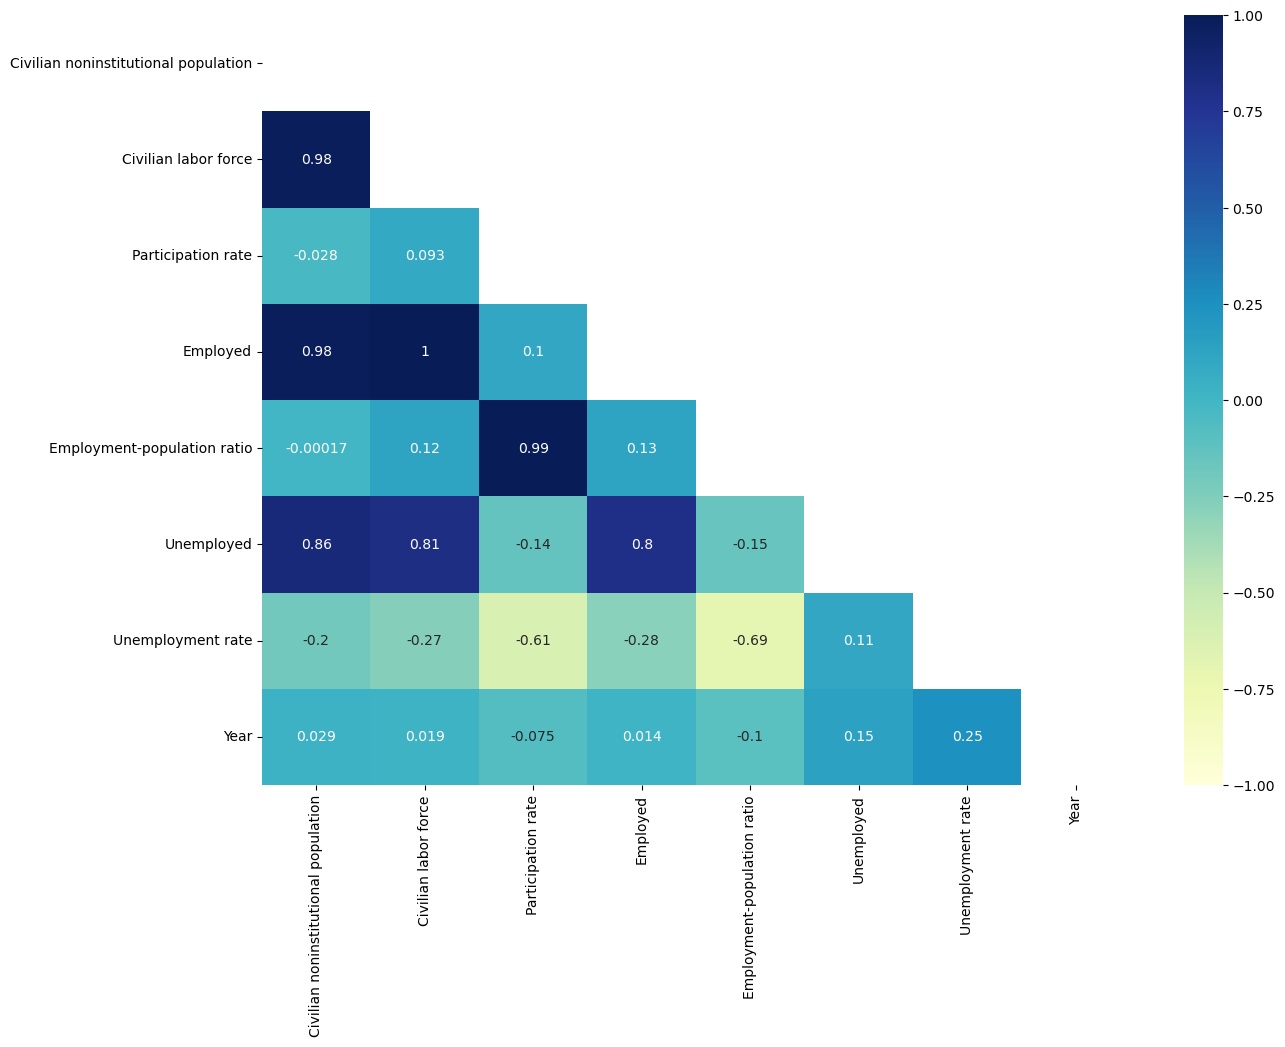

In [35]:
plt.figure(figsize= (14,10))

corr = data1.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True



sns.heatmap(data = corr,
            annot = True,
            mask = mask,
            cmap = "YlGnBu",
            vmin = -1,
            vmax = 1);

Race is the only feature left that is still in object data type. It may be reasonable to convert it to a integer type if we can do so without it losing its informational value. 

Label Encoder can be used to accomplish this. It will convert all race value to an encoded value. For example: all races listed as white will be given a value of 0, all races listed as Black or African American will be given a value of 1, etc. 

We can then retrace each value in the race column to its classification. 

In [36]:
from sklearn.preprocessing import LabelEncoder

In [37]:
le = LabelEncoder()

In [38]:
data1['Race'] = le.fit_transform(data1['Race'])

Confirm if conversion was successful

In [40]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Civilian noninstitutional population  392 non-null    int32  
 1   Civilian labor force                  392 non-null    int32  
 2   Participation rate                    392 non-null    float64
 3   Employed                              392 non-null    int32  
 4   Employment-population ratio           392 non-null    float64
 5   Unemployed                            392 non-null    int32  
 6   Unemployment rate                     392 non-null    float64
 7   Race                                  392 non-null    int32  
 8   Year                                  392 non-null    int64  
dtypes: float64(3), int32(5), int64(1)
memory usage: 20.0 KB


In [41]:
data1['Race'].value_counts()

4    168
3     56
1     56
0     56
2     56
Name: Race, dtype: int64

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Civilian noninstitutional population', ylabel='Density'>

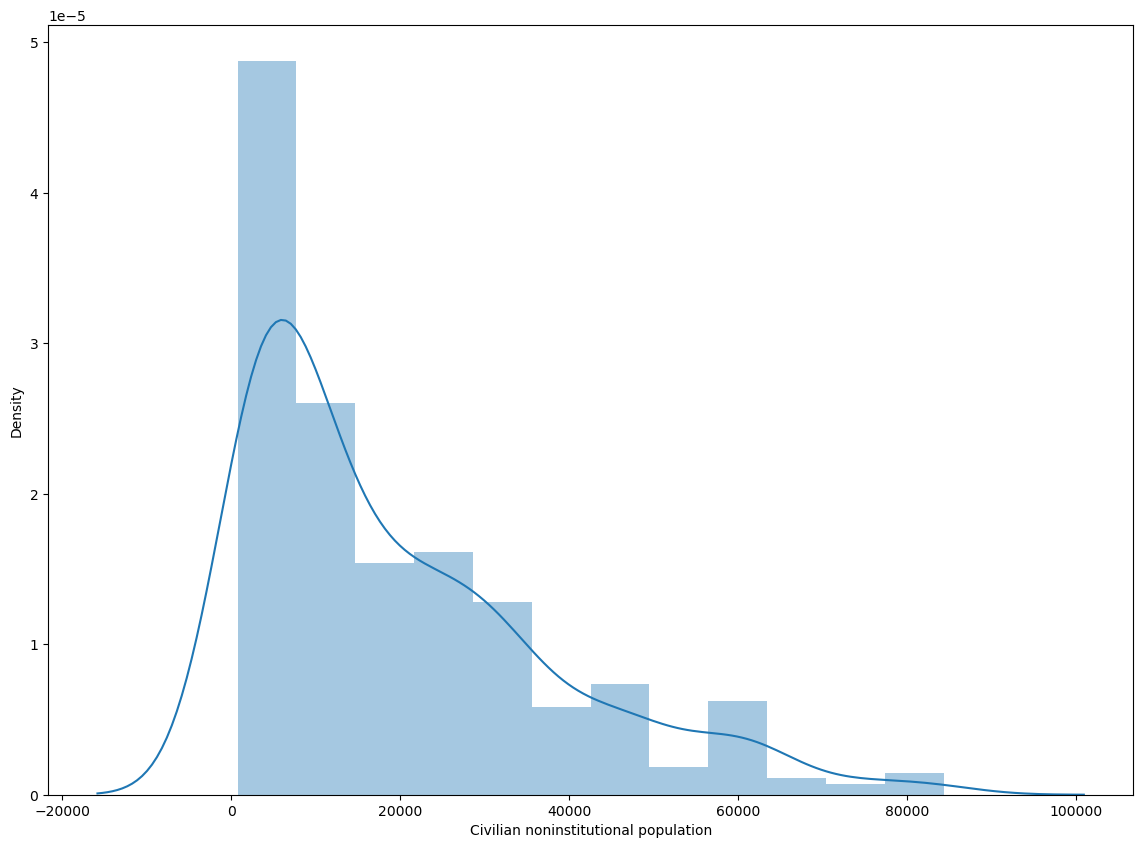

In [42]:
plt.figure(figsize= (14,10))
sns.distplot(data1['Civilian noninstitutional population'])

<AxesSubplot:xlabel='Civilian labor force', ylabel='Count'>

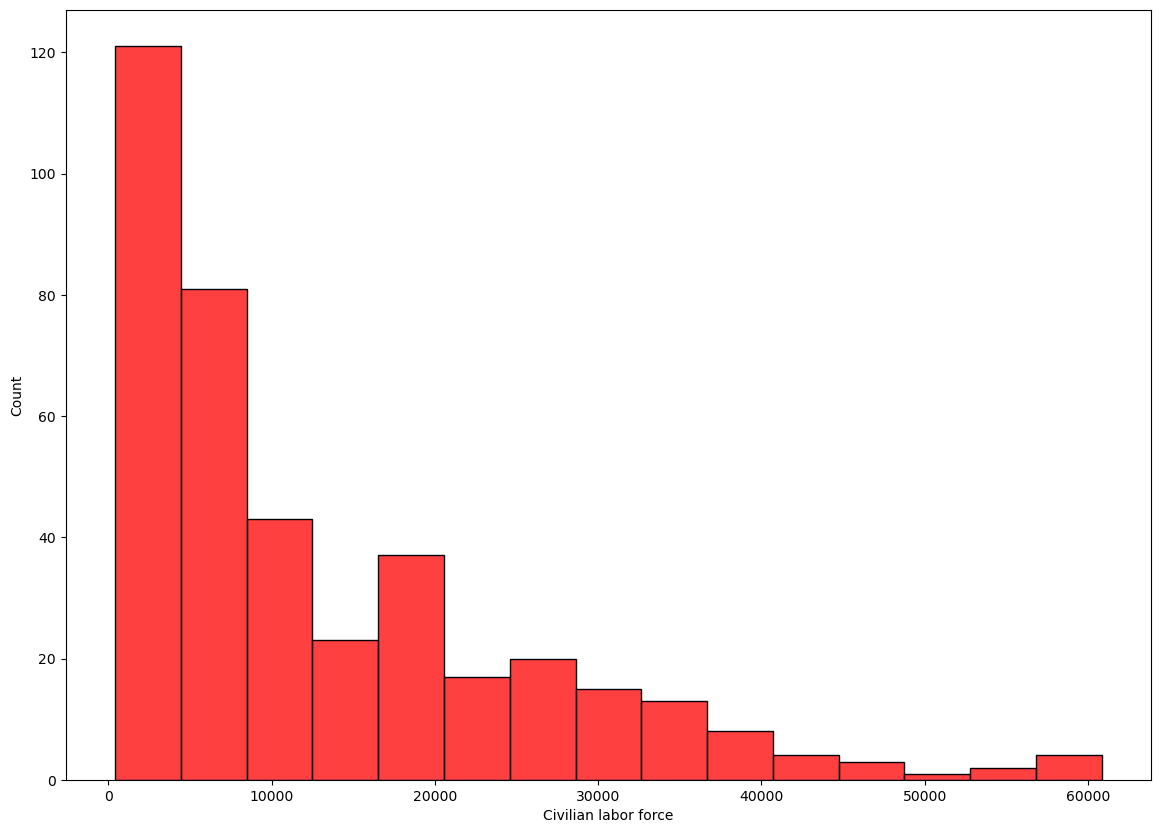

In [44]:
plt.figure(figsize= (14,10))

sns.histplot(data1['Civilian labor force'],color='red')

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Race', ylabel='count'>

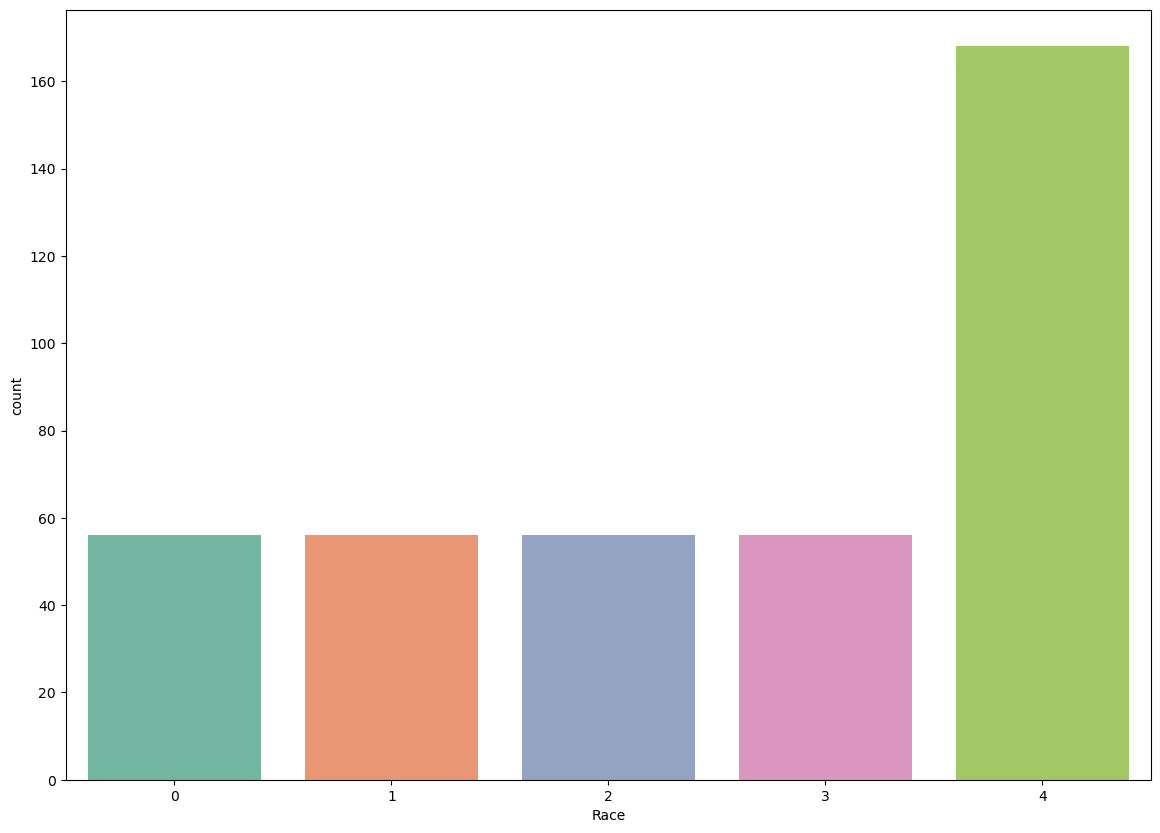

In [45]:
plt.figure(figsize= (14,10))
sns.countplot(data1['Race'],palette='Set2')

EDA on Dataset 2

In [78]:
data4.head(5).style.background_gradient(cmap='Blues').set_properties(**{'font-family': 'Segoe UI'}).hide_index()

C:\Users\zee52\AppData\Local\Temp\ipykernel_52152\4197810368.py:1: FutureWarning: this method is deprecated in favour of `Styler.hide(axis='index')`
  data4.head(5).style.background_gradient(cmap='Blues').set_properties(**{'font-family': 'Segoe UI'}).hide_index()


Unnamed: 0,Unnamed: 1,Unnamed: 2,All races,All races.1,All races.2,White,White.1,White.2,Non-Hispanic White,Non-Hispanic White.1,Non-Hispanic White.2,Black,Black.1,Black.2,Asian,Asian.1,Asian.2,"""Hispanic","""Hispanic .1","""Hispanic .2",White alone or in combination,White alone or in combination.1,White alone or in combination.2,Non-Hispanic White alone or in combination,Non-Hispanic White alone or in combination.1,Non-Hispanic White alone or in combination.2,Black alone or in combination,Black alone or in combination.1,Black alone or in combination.2,Asian alone or in combination,Asian alone or in combination.1,Asian alone or in combination.2
nan,nan,nan,Total,Male,Female,Total,Male,Female,Total,Male,Female,Total,Male,Female,Total,Male,Female,Total,Male,Female,Total,Male,Female,Total,Male,Female,Total,Male,Female,Total,Male,Female
25 Years And Older,Completed 4 Years Of High School Or More,2020.000000,90.9,90.6,91.3,91.3,90.8,91.7,95.1,94.8,95.4,89.4,88.6,90.0,91.6,92.6,90.7,74.3,73.8,74.8,91.2,90.8,91.6,95.1,94.8,95.4,89.5,88.8,90.1,91.7,92.7,90.9
25 Years And Older,Completed 4 Years Of High School Or More,2019.000000,90.1,89.6,90.5,90.5,89.9,91.0,94.6,94.2,95.0,87.9,87.1,88.6,91.2,92.8,89.8,71.8,70.8,72.8,90.4,89.9,91.0,94.6,94.2,94.9,88.0,87.1,88.8,91.5,92.9,90.1
25 Years And Older,Completed 4 Years Of High School Or More,2018.000000,89.8,89.4,90.2,90.2,89.6,90.8,94.3,93.9,94.7,87.9,87.7,88.1,90.5,92.7,88.6,71.6,70.7,72.5,90.2,89.5,90.7,94.3,93.9,94.6,87.9,87.6,88.2,90.7,92.9,88.8
25 Years And Older,Completed 4 Years Of High School Or More,2017.000000,89.6,89.1,90.0,90.1,89.5,90.6,94.1,93.7,94.5,87.3,86.5,87.9,90.9,92.6,89.4,70.5,69.5,71.6,90.0,89.4,90.5,94.1,93.7,94.5,87.2,86.3,88.0,91.1,92.7,89.7


In [71]:
data4.shape

(257, 33)

In [72]:
data4.describe()

,Unnamed: 2
count,256.000000
mean,1987.671875
std,20.014156
min,1940.000000
25%,1972.750000
50%,1988.500000
75%,2004.250000
max,2020.000000


In [73]:
data4.dtypes

Unnamed: 0                                       object
Unnamed: 1                                       object
Unnamed: 2                                      float64
All races                                        object
All races.1                                      object
All races.2                                      object
White                                            object
White.1                                          object
White.2                                          object
Non-Hispanic White                               object
Non-Hispanic White.1                             object
Non-Hispanic White.2                             object
Black                                            object
Black.1                                          object
Black.2                                          object
Asian                                            object
Asian.1                                          object
Asian.2                                         

In [74]:
data4.isnull().sum()

Unnamed: 0                                        1
Unnamed: 1                                        1
Unnamed: 2                                        1
All races                                         0
All races.1                                       0
All races.2                                       0
White                                             8
White.1                                           8
White.2                                           8
Non-Hispanic White                              144
Non-Hispanic White.1                            144
Non-Hispanic White.2                            144
Black                                             0
Black.1                                           0
Black.2                                           0
Asian                                           184
Asian.1                                         184
Asian.2                                         184
"Hispanic                                        68
"Hispanic .1

Convert data types to numeric and conduct EDA.


In [82]:
d4 = data4.drop(data4.index[0])
d4

,Unnamed: 0,Unnamed: 1,Unnamed: 2,All races,All races.1,All races.2,White,White.1,White.2,Non-Hispanic White,...,White alone or in combination.2,Non-Hispanic White alone or in combination,Non-Hispanic White alone or in combination.1,Non-Hispanic White alone or in combination.2,Black alone or in combination,Black alone or in combination.1,Black alone or in combination.2,Asian alone or in combination,Asian alone or in combination.1,Asian alone or in combination.2
1,25 Years And Older,Completed 4 Years Of High School Or More,2020.0,90.9,90.6,91.3,91.3,90.8,91.7,95.1,...,91.6,95.1,94.8,95.4,89.5,88.8,90.1,91.7,92.7,90.9
2,25 Years And Older,Completed 4 Years Of High School Or More,2019.0,90.1,89.6,90.5,90.5,89.9,91.0,94.6,...,91.0,94.6,94.2,94.9,88.0,87.1,88.8,91.5,92.9,90.1
3,25 Years And Older,Completed 4 Years Of High School Or More,2018.0,89.8,89.4,90.2,90.2,89.6,90.8,94.3,...,90.7,94.3,93.9,94.6,87.9,87.6,88.2,90.7,92.9,88.8
4,25 Years And Older,Completed 4 Years Of High School Or More,2017.0,89.6,89.1,90.0,90.1,89.5,90.6,94.1,...,90.5,94.1,93.7,94.5,87.2,86.3,88.0,91.1,92.7,89.7
5,25 Years And Older,Completed 4 Years Of High School Or More,2016.0,89.1,88.5,89.6,89.5,88.8,90.1,93.8,...,90.1,93.8,93.4,94.3,87.2,86.5,87.7,90.6,92.0,89.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,25 To 29 Years,Completed 4 Years Of College Or More,1957.0,10.4,13.5,7.5,11.1,14.5,7.8,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
253,25 To 29 Years,Completed 4 Years Of College Or More,1952.0,10.1,13.8,6.7,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
254,25 To 29 Years,Completed 4 Years Of College Or More,1950.0,7.7,9.6,5.9,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
255,25 To 29 Years,Completed 4 Years Of College Or More,1947.0,5.6,5.8,5.4,5.9,6.2,5.7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
d4.dtypes

Unnamed: 0                                       object
Unnamed: 1                                       object
Unnamed: 2                                      float64
All races                                        object
All races.1                                      object
All races.2                                      object
White                                            object
White.1                                          object
White.2                                          object
Non-Hispanic White                               object
Non-Hispanic White.1                             object
Non-Hispanic White.2                             object
Black                                            object
Black.1                                          object
Black.2                                          object
Asian                                            object
Asian.1                                          object
Asian.2                                         

In [92]:
cols_to_convert = [
#     'Unnamed:2',
    'All races',
    'All races.1',
    'All races.2',
    'White',
    'White.1',
    'White.2',
    'Non-Hispanic White',
    'Non-Hispanic White.1',
    'Non-Hispanic White.2',
    'Black',
    'Black.1',
    'Black.2',
    'Asian',
    'Asian.1',
    'Asian.2'
]

In [93]:
for col in cols_to_convert:
    d4[col] = pd.to_numeric(d4[col], errors='coerce')
    d4[col].fillna(d4[col].mean(), inplace=True)

In [94]:
d4.dtypes

Unnamed: 0                                       object
Unnamed: 1                                       object
Unnamed: 2                                      float64
All races                                       float64
All races.1                                     float64
All races.2                                     float64
White                                           float64
White.1                                         float64
White.2                                         float64
Non-Hispanic White                              float64
Non-Hispanic White.1                            float64
Non-Hispanic White.2                            float64
Black                                           float64
Black.1                                         float64
Black.2                                         float64
Asian                                           float64
Asian.1                                         float64
Asian.2                                         

In [97]:
d4.describe()

,Unnamed: 2,All races,All races.1,All races.2,White,White.1,White.2,Non-Hispanic White,Non-Hispanic White.1,Non-Hispanic White.2,Black,Black.1,Black.2,Asian,Asian.1,Asian.2
count,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000
mean,1987.671875,49.237500,49.576953,48.971875,50.854839,51.166129,50.618145,63.155357,62.587500,63.763393,39.386328,38.746094,39.934766,75.118056,75.687500,74.672222
std,20.014156,30.007994,29.140856,30.903857,29.537111,28.584523,30.537222,19.425398,19.409507,19.493259,31.869931,32.011011,31.794422,9.633525,9.667962,9.727443
min,1940.000000,4.600000,5.500000,3.800000,4.900000,5.900000,4.000000,23.800000,26.800000,20.700000,1.300000,1.400000,1.200000,49.400000,51.500000,45.600000
25%,1972.750000,22.500000,23.975000,20.925000,24.200000,25.300000,22.175000,63.155357,62.587500,63.763393,11.875000,11.900000,12.300000,75.118056,75.687500,74.672222
50%,1988.500000,37.250000,35.050000,39.800000,44.650000,42.800000,46.400000,63.155357,62.587500,63.763393,22.700000,20.500000,25.200000,75.118056,75.687500,74.672222
75%,2004.250000,84.100000,84.125000,84.050000,84.825000,84.125000,85.025000,63.155357,62.587500,63.763393,76.150000,75.375000,76.325000,75.118056,75.687500,74.672222
max,2020.000000,94.800000,94.600000,94.900000,94.700000,94.700000,94.700000,96.400000,96.300000,96.600000,94.900000,94.000000,95.900000,97.500000,97.700000,98.500000


Correlation graph on converted data to explore relationships. 

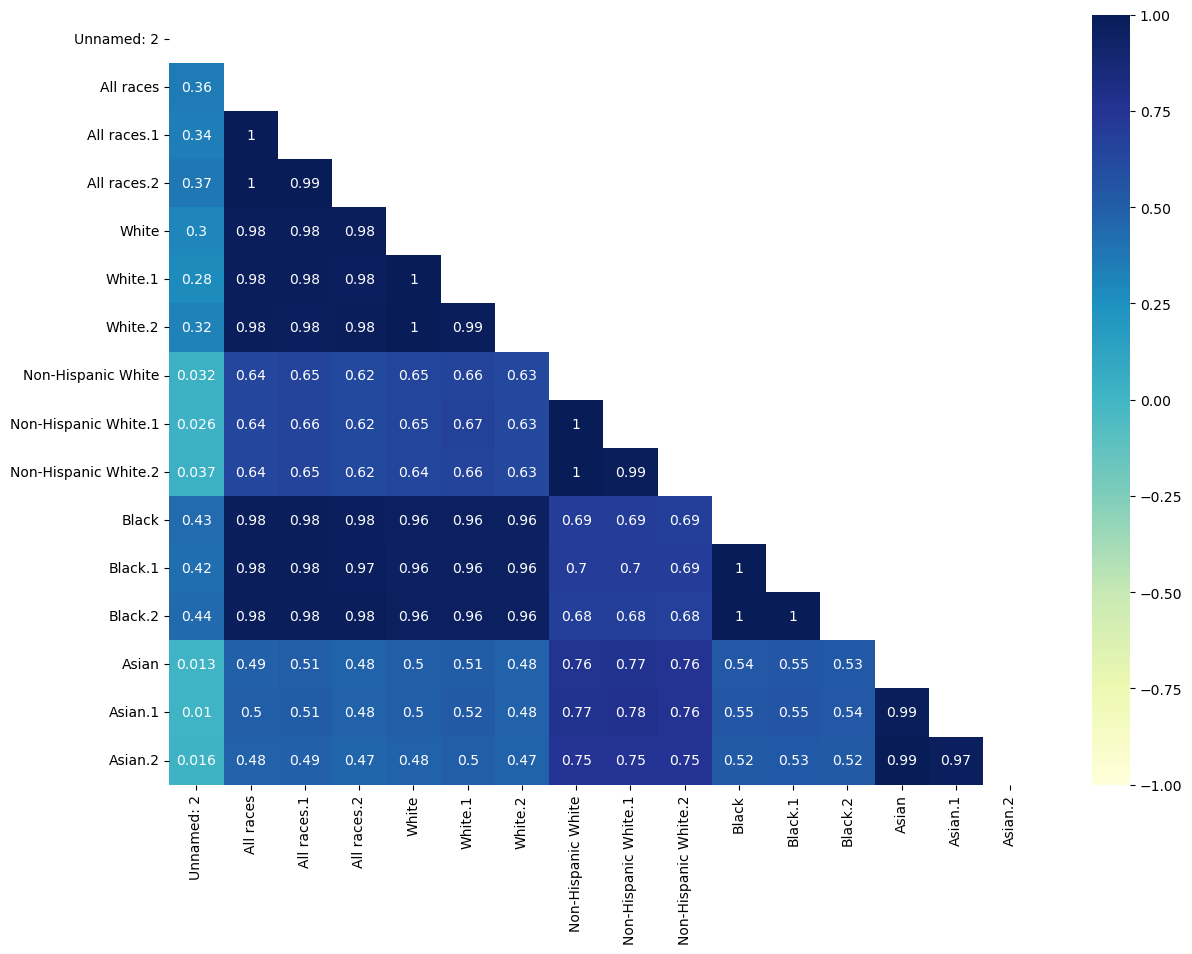

In [95]:
plt.figure(figsize= (14,10))

corr = d4.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True



sns.heatmap(data = corr,
            annot = True,
            mask = mask,
            cmap = "YlGnBu",
            vmin = -1,
            vmax = 1);

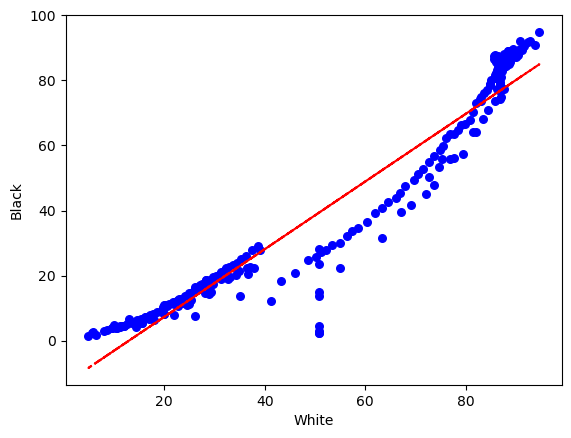

In [98]:
d4.plot.scatter(x = 'White', y = 'Black', s=30, c= 'blue')

x = d4['White']
y = d4['Black']
z = np.polyfit(x,y,1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.show()

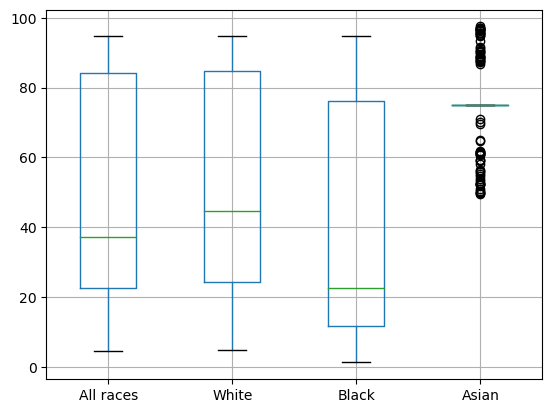

In [99]:
d4.boxplot(column=['All races', 'White', 'Black', 'Asian'])

plt.show()

Not too sure what is happening with the asian box and whisker. Might be due to the data available in the dataset.

EDA on other data sets

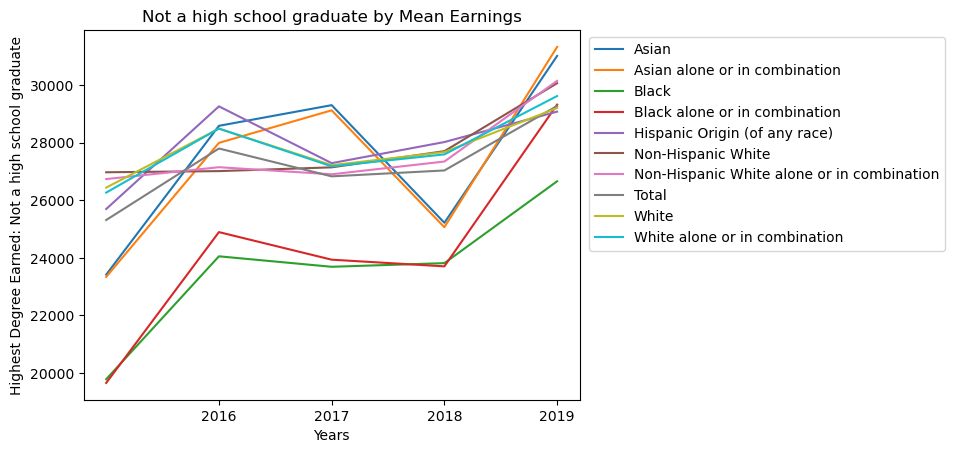

<Figure size 640x480 with 0 Axes>

In [103]:
df = pd.read_pickle('taba-3.pkl')
def random_graph():    
    legend = []
    first_level = df.columns.levels[0]
    random_num = random.randint(0,5)
    rand_column = first_level[random_num]
    for groups in df.index.levels[0]:    
        for index in ['Both Sexes']:     
            try:
                plt.plot([i for i in range(2015, 2020)], df[rand_column].loc[groups, index, [str(i) for i in range(2015, 2020)]]['Mean'])
                legend.append((groups))
            except:
                plt.plot([i for i in range(2015, 2020)], df[rand_column].loc[groups, 'Both sexes', [str(i) for i in range(2015, 2020)]]['Mean'])
                legend.append((groups))

    plt.legend(legend, loc='upper right', bbox_to_anchor=(1.75, 1))
    plt.xticks([i for i in range(2016, 2020)])
    plt.xlabel('Years')
    plt.ylabel('Highest Degree Earned: ' + str(rand_column))
    plt.title(f'{rand_column} by Mean Earnings');
    plt.figure()
random_graph()

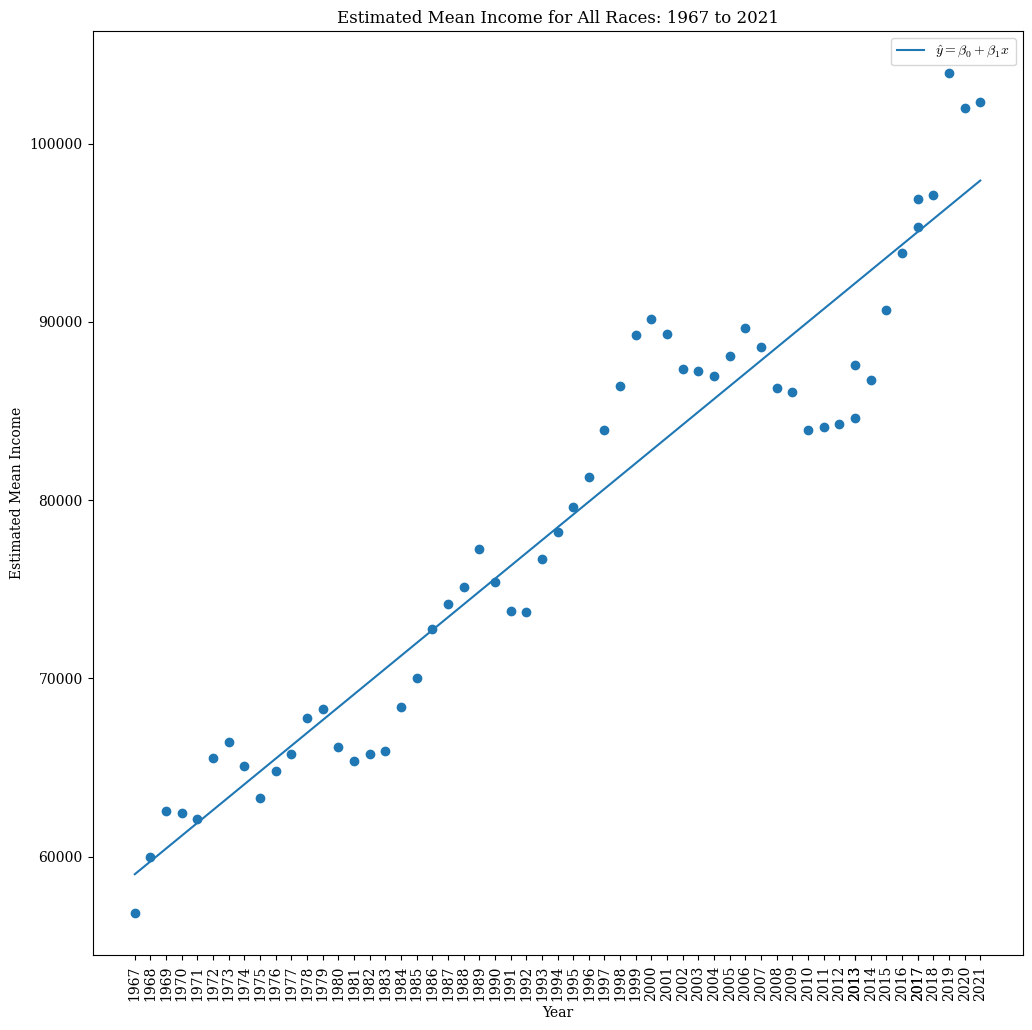

In [106]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


df = pd.read_pickle("table-A2.pkl") # Unpickle in dataframe

y = df.loc['All Races']['Mean Income']['Estimate'].sort_index() # Sort from years 1967-2021
x = list(y.index)
for i in range(0, len(x)):
    x[i] = int(x[i]) # Convert each string to an integer

x = np.array(x).reshape(-1, 1) # We have one feature so we must use reshape(-1, 1)
y = np.array(y)



lr = LinearRegression().fit(x, y) # Linear fit of the data

t = np.linspace(1967, 2021, 1000) # Variable for ploting
y_hat = lr.intercept_ + lr.coef_ * t # Our linear fit



fig = plt.figure(figsize=(12, 12))
plt.rcParams['mathtext.fontset'] = 'cm' # Use Computer Modern
plt.rcParams['font.family'] = ['serif'] # I cannot stand the default font

plt.title('Estimated Mean Income for All Races: 1967 to 2021')
plt.scatter(x, y) # Scatter plot mean income
plt.plot(t, y_hat, label=r'$\hat{y} = \beta_{0} + \beta_{1}x$') # Plot regression function 
plt.xlabel('Year')
plt.xticks(x)
plt.ylabel('Estimated Mean Income')
plt.legend()
plt.xticks(rotation=90);

White Alone Not Hispanic


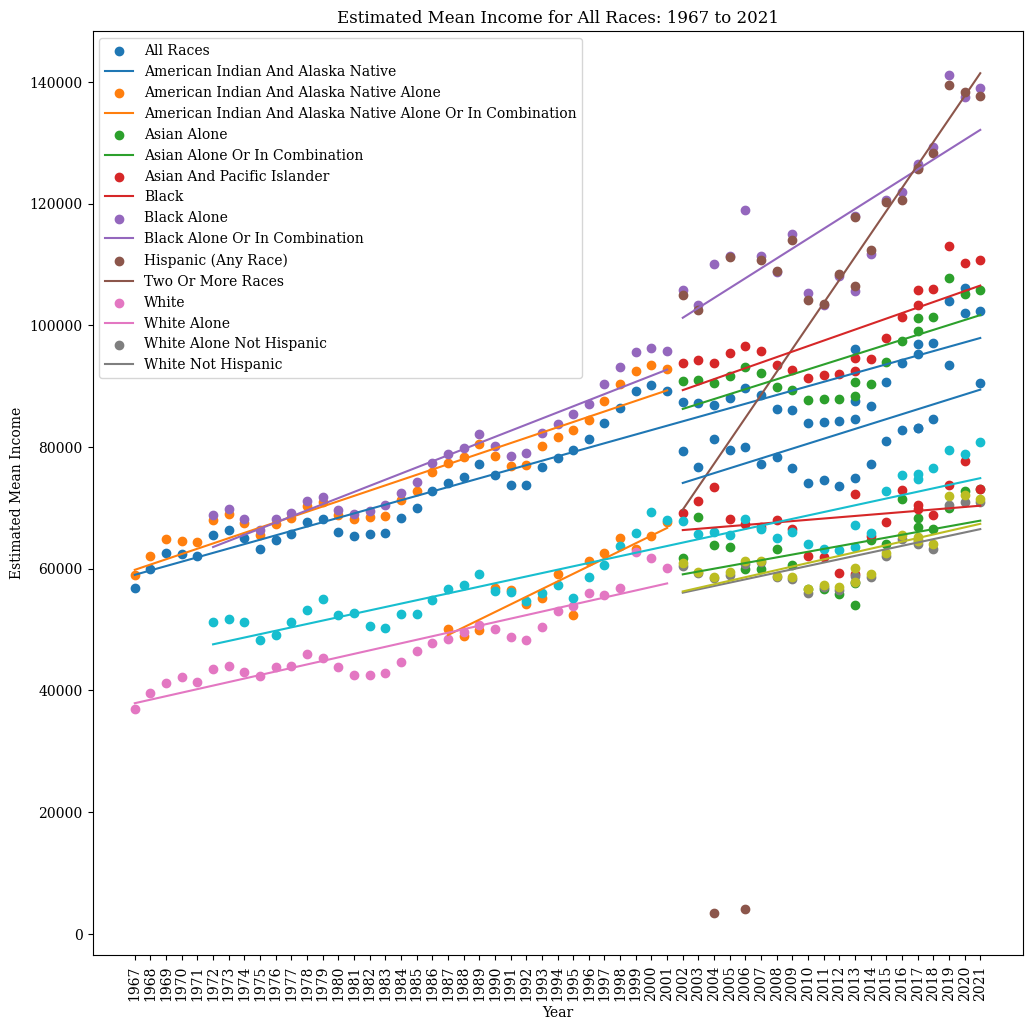

In [107]:
keys = list(df.index.levels[0])

fig = plt.figure(figsize=(12, 12))
plt.rcParams['mathtext.fontset'] = 'cm' # Use Computer Modern
plt.rcParams['font.family'] = ['serif'] # I cannot stand the default font
plt.title('Estimated Mean Income for All Races: 1967 to 2021')
years = [i for i in range(1967, 2022)]

for i in range(0, len(keys)):
    try:
        y = df.loc[keys[i]]['Mean Income']['Estimate'].sort_index() # Sort from years 1967-2021
        x = list(y.index)
        for i in range(0, len(x)):
            x[i] = int(x[i]) # Convert each string to an integer

        x = np.array(x).reshape(-1, 1) # We have one feature so we must use reshape(-1, 1)
        y = np.array(y)



        lr = LinearRegression().fit(x, y) # Linear fit of the data

        t = np.linspace(min(x), max(x), 1000) # Variable for ploting
        y_hat = lr.intercept_ + lr.coef_ * t # Our linear fit



        plt.scatter(x, y) # Scatter plot mean income
        plt.plot(t, y_hat) # Plot regression function 
        plt.xlabel('Year')
        plt.xticks(years)
        plt.ylabel('Estimated Mean Income')
        plt.xticks(rotation=90);
    except:
        print(keys[i])
    plt.legend(keys)